In [1]:
import pandas as pd
import sys
from paths_usa import *
import seaborn as sns
sys.path.append('./..')
from refuelplot import *
setup()

In [12]:
results_path[:-4]

'/data/users/kgruber/results'

res = pd.read_pickle(results_path[:-3] + 'results_merged.pkl')
res_usa = res[res.country=='USA'].drop('country',axis=1)

In [30]:
res_2010 = pd.read_csv(results_path + '/stats_GWA3.csv',index_col=0)
res_2010['timespan'] = '2010-2019'
res_2000 = pd.read_csv(results_path + '/stats_GWA3_2000.csv',index_col=0)
res_2000['timespan'] = '2000-2019'
res = pd.concat([res_2000,res_2010],axis=0)

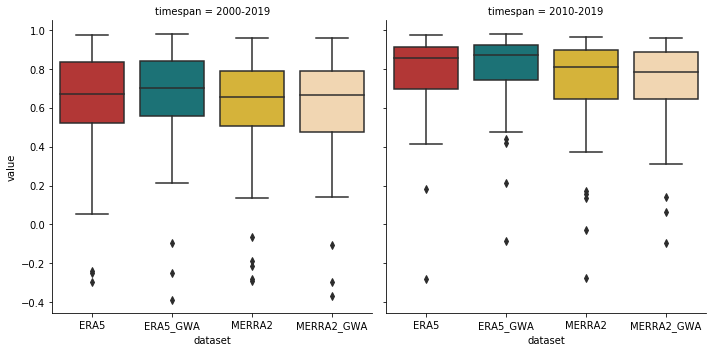

In [31]:
sns.catplot(data=res[res.param=='cor'],kind='box',
         x='dataset',y='value',col='timespan')

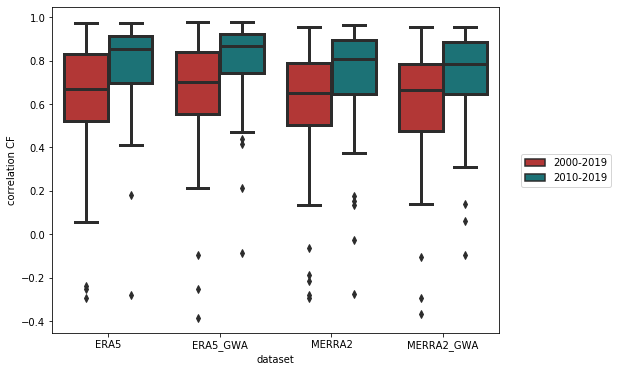

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x='dataset',y='value',hue='timespan',data=res[res.param=='cor'],linewidth=3).set_ylabel('correlation CF')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 0.55), loc=2, borderaxespad=0.)

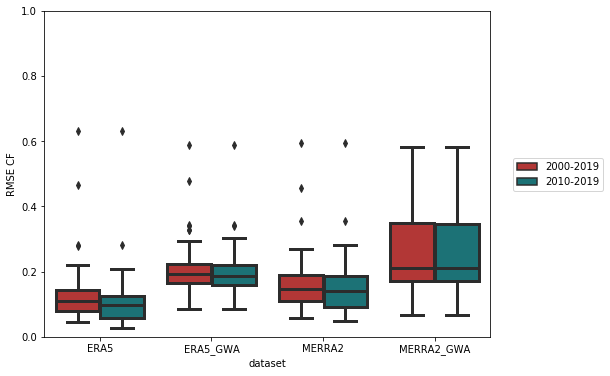

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x='dataset',y='value',hue='timespan',data=res[res.param=='rmse'],linewidth=3).set_ylabel('RMSE CF')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 0.55), loc=2, borderaxespad=0.)

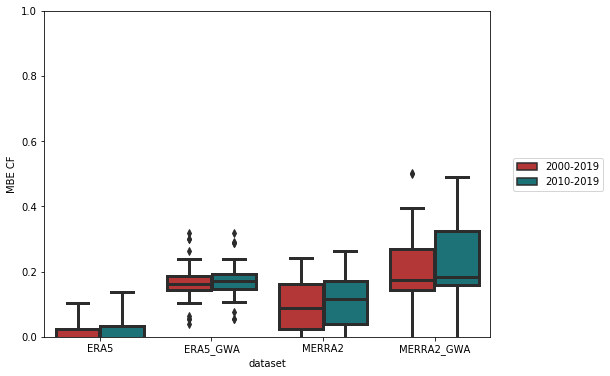

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x='dataset',y='value',hue='timespan',data=res[res.param=='mbe'],linewidth=3).set_ylabel('MBE CF')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 0.55), loc=2, borderaxespad=0.)

# rsme + mbe

<Figure size 576x432 with 0 Axes>

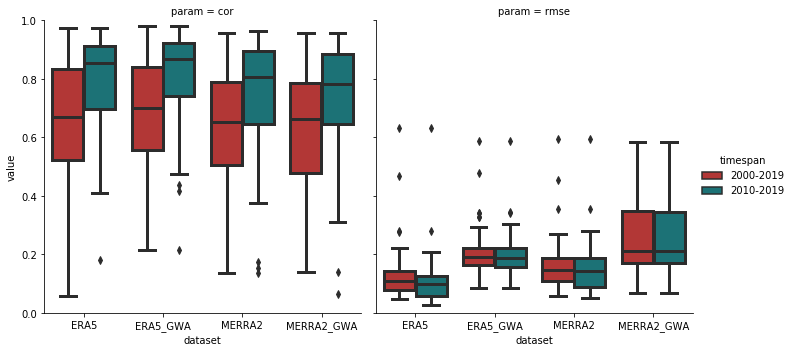

In [68]:
plt.figure(figsize=(8,6))
sns.catplot(kind='box',col='param',x='dataset',y='value',hue='timespan',data=res[(res.param=='cor')|(res.param=='rmse')],
linewidth=3)#,sharey=False)

#g = sns.boxplot(x='dataset',y='value',hue='timespan',data=res[(res.param=='cor')|(res.param=='rmse')],
#                linewidth=3,col_wrap=2,sharey=False)
plt.ylim(0,1)
#g.axes[0].set_ylim((0,1))
#g.axes[1].set_ylim((0,0.75))
plt.savefig(results_path + '/2000vs2010.png')